# Day 1 - Data Science Essentils Program

Agenda:
- setting up IntelliJ and **Python** packages
- Data manipulation with pandas package
- Visualizations with pandas, matplotlib, seaborn

# Header 1
## Header 2
### Header 3

**Shortcuts in Jupyter**
- CTRL ENTER -> run a block of code
- SHIFT ENTER --> run a block of code, and go to the next
- A/B --> to add a block Above or Below
- Y/M --> to change between Code block or Markdown
    - Y = code
    - M = markdown

In [4]:
x = 5
x + 2

7

## Pandas Package
- data manipulation
- "Excel for Python"
    - importing data: excel, csv, html, sql databases
    - sorting
    - filtering
    - pivot tables
    - data cleaning and exploring data
    - stats
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- new data type that you can use --> "dataframe" --> fancy word for "table"
- you can perform matrix math with the columns
    - no need for looping through each row to do calcs

In [11]:
nums = [5, 2, 10, 15]
stockData = {'AAPL':100, 'MSFT':300,'NFLX':100}
stockData['MSFT']

300

In [5]:
import pandas as pd

**You can create a dataframe from scratch**
- use a dictionary where the keys are the headers, values are the data in each col

In [14]:
companies = ['A', 'B', 'C', 'D']
prices = [100, 200, 50, 60]
eps = [10, 15, 5.5, 20]
stockData = {'Company':companies, 'Price':prices, 'EPS':eps}
table = pd.DataFrame( stockData )
table['P/E'] = table['Price'] / table['EPS']
table

,Company,Price,EPS,P/E
0,A,100,10.0,10.000000
1,B,200,15.0,13.333333
2,C,50,5.5,9.090909
3,D,60,20.0,3.000000


In [12]:
df = pd.read_csv('StockData/SP500.csv')
# df

In [18]:
finData = pd.read_excel("ExData/Data Manipulation Worksheet.xlsx")
# finData

In [16]:
#!pip install openpyxl
    #if getting any errors importing xlsx files

## Check and Explore Your Data
- .head(), .tail() --> first/last 5 rows
- .info() --> info about each column (# rows, data types)

In [24]:
# finData.head()
# finData.tail()
finData.info()
    # check the row numbers (non-null values) --> they should be the same
    # if they're not:
                # 1) missing data
                # 2) too much data got imported (extra calcs or info at top or bottom of table)
    #check data types:
            #numbers --> int or float
            #dates --> datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            564 non-null    object        
 2   TYPE              558 non-null    object        
 3   SIZE              558 non-null    object        
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 26.8+ KB


In [ ]:
#Option 1 - skip the messy rows at the bottoms (11 rows)
finData = pd.read_excel("ExData/Data Manipulation Worksheet.xlsx", skipfooter=11)

#Option 2 - use the cleaned up tab
finData = pd.read_excel("ExData/Data Manipulation Worksheet.xlsx", sheet_name='Financing Table Clean')
                                                                    #sheet_name=1
finData.info()

In [27]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [29]:
df = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'])

In [31]:
# df.head()

**Converting Dates**
- can fix the dates columns while importing with `parse_dates=[list of headers]`
- can convert later with the `pd.to_datetime(table[header])`

In [33]:
pd.to_datetime('10/3/2023') # Oct 3, or is it March 10??
        #they convert it to yyyy-mm-dd

Timestamp('2023-10-03 00:00:00')

In [34]:
pd.to_datetime('10/3/2023', format='%d/%m/%Y')
            # %d = dd, %m = mm, %Y = yyyy, %y = yy

Timestamp('2023-03-10 00:00:00')

In [35]:
aapl = pd.read_csv('StockData/AAPL.csv')

In [37]:
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


**Changing Index**
- you can pick a column to be the index --> identifier for the rows
- can change while importing with `index_col=[headers]`
- can change after with `table.set_index(header)`

In [41]:
# aapl.set_index('Date')
    #doesn't keep the change
aapl = aapl.set_index('Date')
# aapl.set_index('Date', inplace=True)

In [43]:
df = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'], index_col=['Date'])

## Accessing your data
- looking at columns, rows, slices, or specific values
- accessing rows:
    - table.iloc[x:y] --> integer location
    - table.loc[x:y] --> where x and y are the new index you picked (e.g. dates)
- accessing columns:
    - table['header']
    - table[['h1','h2','h3',...]]
- slice (section of table):
    - table.iloc[x:y][[list of headers]] 

In [50]:
finData.iloc[5:10]
    #   5 <= row number < 10
finData.iloc[-5:] #last 5 rows
df.iloc[0:5]
df.loc['2013-10-01':'2013-10-07']
        #with loc (new index) it IS inclusive of top end


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000
2013-10-02,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000
2013-10-03,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000
2013-10-04,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000
2013-10-07,1687.150024,1687.150024,1674.699951,1676.119995,1676.119995,2678490000


In [55]:
df.loc['2017-3'] #all of march
df.loc['2017-1':'2017-3']
sp500_2016 = df.loc['2016'] #all of 2016
        #creating a "view" - linked up to original data
sp500_2016 = df.loc['2016'].copy() #a new table

In [56]:
sp500_2016

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000
...,...,...,...,...,...,...
2016-12-23,2260.250000,2263.790039,2258.840088,2263.790039,2263.790039,2020550000
2016-12-27,2266.229980,2273.820068,2266.149902,2268.879883,2268.879883,1987080000
2016-12-28,2270.229980,2271.310059,2249.110107,2249.919922,2249.919922,2392360000


In [47]:
text = "Bogdan"
text[0:3] #Bog

'Bog'

In [60]:
demo = finData.set_index('DATE')
demo.loc['2006-01-28']
    #index doesn't have to be unique

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-01-28,US Bank N.A.,Global Notes,1000.210,Finance,Lehman Brothers
2006-01-28,Alliance National Muni Income Fund,Initial Public Offering,283.600,Finance,Salomon Smith Barney
2006-01-28,Lloyds Bank Plc NY,CD Notes,200.580,Finance,Merrill Lynch
2006-01-28,FBR Asset Investment Corp,Equity Follow-On Offering,127.200,Real Estate,"Friedman, Billings, Ramsey"
2006-01-28,Alliance California Muni Income Fund,Initial Public Offering,117.100,Finance,Salomon Smith Barney
2006-01-28,SeaChange International Inc,Equity Follow-On Offering,104.200,Computers & Electronics,Morgan Stanley
2006-01-28,National City Bank,Bank Notes,100.212,Finance,J.P. Morgan
2006-01-28,Rabobank Nederland,CD Notes,80.300,Finance,Merrill Lynch
2006-01-28,Synaptics Inc,Initial Public Offering,55.200,Computers & Electronics,Bear Stearns


## Lunch Break until 1pm ET

In [64]:
# finData
df['Open'] #date also shows up bc it's the index

Date
2013-09-30    1687.260010
2013-10-01    1682.410034
2013-10-02    1691.900024
2013-10-03    1692.349976
2013-10-04    1678.790039
                 ...     
2018-09-24    2921.830078
2018-09-25    2921.750000
2018-09-26    2916.979980
2018-09-27    2911.649902
2018-09-28    2910.030029
Name: Open, Length: 1260, dtype: float64

In [68]:
colsToShow = ['Open','Close'] #list
df[colsToShow]

,Open,Close
Date,,
2013-09-30,1687.260010,1681.550049
2013-10-01,1682.410034,1695.000000
2013-10-02,1691.900024,1693.869995
2013-10-03,1692.349976,1678.660034
2013-10-04,1678.790039,1690.500000
...,...,...
2018-09-24,2921.830078,2919.370117
2018-09-25,2921.750000,2915.560059
2018-09-26,2916.979980,2905.969971


In [75]:
finData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            557 non-null    object        
 2   TYPE              557 non-null    object        
 3   SIZE              557 non-null    float64       
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 26.2+ KB


In [77]:
# finData['SIZE']
finData[['DATE','SIZE','INDUSTRY']]

,DATE,SIZE,INDUSTRY
0,2006-01-28,1000.21,Finance
1,2006-01-28,283.60,Finance
2,2006-01-28,200.58,Finance
3,2006-01-28,127.20,Real Estate
4,2006-01-28,117.10,Finance
...,...,...,...
552,2006-06-21,350.00,Utility
553,2006-06-21,250.10,Finance
554,2006-06-21,202.50,Utility
555,2006-06-21,200.10,Finance


In [72]:
#all Open and Close prices of S&P in 2014
df.loc['2014'][['Open','Close']]
df.loc['2014',['Open','Close']] #exact same as line above

,Open,Close
Date,,
2014-01-02,1845.859985,1831.979980
2014-01-03,1833.209961,1831.369995
2014-01-06,1832.310059,1826.770020
2014-01-07,1828.709961,1837.880005
2014-01-08,1837.900024,1837.489990
...,...,...
2014-12-24,2083.250000,2081.879883
2014-12-26,2084.300049,2088.770020
2014-12-29,2087.629883,2090.570068


In [73]:
#share price on Dec 29, 2014
df.loc['2014-12-29']['Close'] #similar to doing a vlookup in Excel

2090.570068

In [80]:
df.info()
# df[['Open']]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2013-09-30 to 2018-09-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 101.2 KB


In [82]:
df.index
# df['Date'] #this doesn't work anymore, Date no longer a column

DatetimeIndex(['2013-09-30', '2013-10-01', '2013-10-02', '2013-10-03',
               '2013-10-04', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26',
               '2018-09-27', '2018-09-28'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

## Filter Data
- so far we've filtered only using the index with .loc
- table[conditions]
    - and vs or logic
    - and logic --> ALL the conditions have to be True to get a True
    - or logic --> ANY of the conditions could be True and you get a True
    - and --> &
    - or --> |
    - table[  (cond1) & (cond2)]
        - separate the conditions in smaller brackets for order of operations

In [102]:
#deals done JPM in Finance
cond1 = finData['INDUSTRY'] == 'Finance'
cond2 = finData['LEAD UNDERWRITER'] == 'J.P. Morgan'
finData[cond1 & cond2]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
6,2006-01-28,National City Bank,Bank Notes,100.212,Finance,J.P. Morgan
17,2006-01-30,Chugach Electic Assoc Inc,Sr Notes,180.200,Finance,J.P. Morgan
48,2006-02-07,Bayer Hypo Vereinsbnk NY,CD Notes,100.203,Finance,J.P. Morgan
52,2006-02-08,Bayerische Landesbank (New York),CD Notes,100.202,Finance,J.P. Morgan
61,2006-02-12,Trinity Industries,Notes,170.000,Finance,J.P. Morgan
...,...,...,...,...,...,...
521,2006-06-10,JP Morgan Chase,Bank Notes,91.000,Finance,J.P. Morgan
524,2006-06-11,Westpac Banking Corp NY,CD Notes,100.103,Finance,J.P. Morgan
528,2006-06-12,Westpac Banking Corp NY,CD Notes,100.102,Finance,J.P. Morgan
535,2006-06-13,National City Bank,Bank Notes,75.000,Finance,J.P. Morgan


In [95]:
# finData[  (finData['INDUSTRY'] == 'Finance') &  (finData['LEAD UNDERWRITER'] == 'J.P. Morgan')]

In [99]:
filter1 = finData[  (finData['INDUSTRY'] == 'Finance') &  (finData['LEAD UNDERWRITER'] == 'J.P. Morgan')]
filter1.reset_index(inplace=True, drop=True)
        #inplace= keep the change, drop = get rid of old index
filter1

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
0,2006-01-28,National City Bank,Bank Notes,100.212,Finance,J.P. Morgan
1,2006-02-07,Bayer Hypo Vereinsbnk NY,CD Notes,100.203,Finance,J.P. Morgan
2,2006-02-08,Bayerische Landesbank (New York),CD Notes,100.202,Finance,J.P. Morgan
3,2006-02-13,National City Bank Indiana,Bank Notes,115.000,Finance,J.P. Morgan
4,2006-02-13,Canadian Imperial Bk-NY Agency,CD Notes,100.200,Finance,J.P. Morgan
5,2006-02-14,Key Bank NA,Bank Notes,100.199,Finance,J.P. Morgan
6,2006-02-19,Canadian Imperial Bk-NY Agency,CD Notes,100.196,Finance,J.P. Morgan
7,2006-02-19,Westpac Banking Corp NY,CD Notes,100.197,Finance,J.P. Morgan
8,2006-02-20,Canadian Imperial Bk-NY Agency,CD Notes,100.193,Finance,J.P. Morgan
9,2006-02-21,National City Bank,Bank Notes,60.100,Finance,J.P. Morgan


In [87]:
sorted(finData['LEAD UNDERWRITER'].unique())
    #to quickly remove duplicates and also sort

['ABN AMRO',
 'Adams, Harkness & Hill Inc.',
 'Banc of America Securities',
 'Bank One Capital Markets',
 'Barclays Capital',
 'Bear Stearns',
 'Credit Suisse First Boston',
 'Deutsche Bank',
 'Friedman, Billings, Ramsey',
 'Goldman Sachs',
 'J.P. Morgan',
 'Jefferies & Company',
 'Lehman Brothers',
 'McDonald Investments, Inc.',
 'Merrill Lynch',
 'Morgan Stanley',
 'Needham & Company',
 'Raymond James & Associates',
 'Robert W. Baird',
 'Robertson Stephens',
 'Salomon Smith Barney',
 'SoundView Technology Group',
 'Stephens Inc.',
 'U.S. Bancorp Piper Jaffray Inc',
 'UBS Warburg',
 'Wachovia Securities',
 'William Blair & Company']

In [100]:
#all the deals between 100 and 500
finData[ (finData['SIZE']>=100) &  (finData['SIZE']<=500) ]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
1,2006-01-28,Alliance National Muni Income Fund,Initial Public Offering,283.60,Finance,Salomon Smith Barney
2,2006-01-28,Lloyds Bank Plc NY,CD Notes,200.58,Finance,Merrill Lynch
3,2006-01-28,FBR Asset Investment Corp,Equity Follow-On Offering,127.20,Real Estate,"Friedman, Billings, Ramsey"
4,2006-01-28,Alliance California Muni Income Fund,Initial Public Offering,117.10,Finance,Salomon Smith Barney
5,2006-01-28,SeaChange International Inc,Equity Follow-On Offering,104.20,Computers & Electronics,Morgan Stanley
...,...,...,...,...,...,...
551,2006-06-20,Anworth Mortgage Asset Corp,Equity Follow-On Offering,117.00,Real Estate,"Friedman, Billings, Ramsey"
552,2006-06-21,Alabama Power Company,Sr Notes,350.00,Utility,Lehman Brothers
553,2006-06-21,Sears Roebuck Acceptance Corp,Sr Notes,250.10,Finance,Merrill Lynch
554,2006-06-21,DQE Inc,Equity Follow-On Offering,202.50,Utility,Lehman Brothers


In [108]:
#Changing the casing of headers
# finData.columns
newCols = [ x.lower() for x in finData.columns]
newCols
# finData.columns = newCols #overwrite the old columns with the new spelling

['date', 'issuer', 'type', 'size', 'industry', 'lead underwriter']

## Calculated Fields and Quick Stats
- can find info about your data with simple math formulas
    - df['header'].max(), or .min, .sum, ...
    - df.describe()

In [115]:
stats = df[['Open','High']].describe()
# finData.describe()

In [119]:
stats = df.describe()
stats.to_excel('Output/sp500 stats.xlsx')

In [122]:
df.loc['2016'][['Open','High']].describe()
    #stats just for 2016 data

,Open,High
count,252.000000,252.000000
mean,2094.091550,2103.306866
std,101.083242,98.240098
min,1833.400024,1847.000000
25%,2045.250030,2057.440003
50%,2102.950074,2111.405029
75%,2168.917419,2173.982544
max,2270.540039,2277.530029


In [114]:
finData['SIZE'].sum(), finData['SIZE'].max()

(155176.159, 3885.0)

**Simple Calcs**
- you can use matrix math - e.g. Col A / Col B, or Col A + Col B, etc.

In [125]:
df['Intraday Return'] = df['Close'] / df['Open'] - 1
        #   (close - open) / open = close/open - 1
df['Daily Return'] = df['Close'] / df['Close'].shift(1) - 1
                        # today / yesterday - 1
                        # yesterday is in row above
                        # if dates were sorted new to old

df['Returns'] = df['Close'].pct_change() #same as using the shift(1) above

,Open,High,Low,Close,Adj Close,Volume,Intraday Return,Daily Return,Returns
Date,,,,,,,,,
2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000,-0.003384,NaN,NaN
2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000,0.007483,0.007999,0.007999
2013-10-02,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000,0.001164,-0.000667,-0.000667
2013-10-03,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000,-0.008089,-0.008979,-0.008979
2013-10-04,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000,0.006975,0.007053,0.007053
...,...,...,...,...,...,...,...,...,...
2018-09-24,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000,-0.000842,-0.003516,-0.003516
2018-09-25,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000,-0.002119,-0.001305,-0.001305
2018-09-26,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000,-0.003774,-0.003289,-0.003289


In [123]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000
2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000
2013-10-02,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000
2013-10-03,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000
2013-10-04,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000
...,...,...,...,...,...,...
2018-09-24,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000
2018-09-25,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000
2018-09-26,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000


## Coffee Break + Working Session
- work until 2:45pm
- Production/miniPandasAssignmentQuestions.py
1) Load Apple data set (StockData --> aapl.csv) and Financing Deals data set (ExData --> Data Manip --> Clean tab)
2) Find all the days of Apple where closing share price was between 70 and 75
3) Financing Deals data (Data Manip file) --> find all deals done by GS and JPM
4) Find all the deals done in May of 2006
5) Find all the deals done by Merrill Lynch in Real Estate
6) Calculate the returns of Apple's closing share price what is the average return and standard deviation?

## Takeup Mini Pandas Assignment

**Question 1**
- import the data, AAPL and Data Manip file

In [171]:
import pandas as pd
aapl = pd.read_csv('StockData/AAPL.csv', 
                   parse_dates=['Date'], 
                   index_col=['Date'])

finData = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', sheet_name=1)
                    #for xlsx files need to use integers for index columns
                    # index_col=['DATE'] will not work, need to do index_col=0

**Question 2**
- prices bw 70 and 75 for AAPL
  

In [136]:
pd.__version__

'2.0.3'

In [138]:
aapl[(aapl['Close']>=70)  &   (aapl['Close']<=75) ]

aapl[ aapl['Close'].between(70,75, inclusive='both')]
            #the way between works has changed since vs 1.3.0 of pandas

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-11,69.570000,70.548569,69.308571,70.401428,64.154510,66934700
2013-10-14,69.975716,71.082855,69.907143,70.862854,64.574989,65474500
2013-10-15,71.072861,71.714287,70.788574,71.239998,64.918671,80018400
2013-10-16,71.541428,71.790001,71.318573,71.587143,65.235016,62775300
2013-10-17,71.425713,72.111427,71.382858,72.071426,65.676331,63398300
2013-10-18,72.284286,72.751427,72.244286,72.698570,66.247795,72635500
2013-10-21,73.110001,74.900002,73.074287,74.480003,67.871170,99526700
2013-10-22,75.201431,75.492859,72.575714,74.267143,67.677200,133515900
2013-10-23,74.142860,75.095711,74.142860,74.994286,68.339828,78430800


**Question 3**
- GS and JPM
  1) finData[cond1 | cond2]
  2) finData['LEAD UNDERWRITER'].isin(list of options)
  3) finData['LEAD UNDERWRITER'].str.contains('criteria')
     - can use regex with contains, e.g. ('Goldamn | J.P. Morgan')

In [140]:
cond1 = finData['LEAD UNDERWRITER'] == 'Goldman Sachs'
cond2 = finData['LEAD UNDERWRITER'] == 'J.P. Morgan'
filterQ3 = finData[cond1 | cond2]  # OR logic

In [143]:
banks = ['Goldman Sachs', 'J.P. Morgan']
filterQ3 = finData[finData['LEAD UNDERWRITER'].isin(banks)]

In [157]:
# .str.anyStringMethod
"bogdan".upper()
finData['INDUSTRY'].str.lower()

0          finance
1          finance
2          finance
3      real estate
4          finance
          ...     
552        utility
553        finance
554        utility
555        finance
556     healthcare
Name: INDUSTRY, Length: 557, dtype: object

In [160]:
# finData[finData['LEAD UNDERWRITER'].str.contains('Goldman | Morgan')]
finData[finData['LEAD UNDERWRITER'].str.contains('Goldman|J\.P\. Morgan')]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
6,2006-01-28,National City Bank,Bank Notes,100.212,Finance,J.P. Morgan
10,2006-01-29,Southern Co. Capital Funding,Sr Notes,400.200,Utility,Goldman Sachs
17,2006-01-30,Chugach Electic Assoc Inc,Sr Notes,180.200,Utility,J.P. Morgan
30,2006-02-05,Aramark Corporation,Equity Follow-On Offering,793.500,Retail,Goldman Sachs
42,2006-02-06,"Netscreen Technologies, Inc.",Equity Follow-On Offering,184.000,Computers & Electronics,Goldman Sachs
...,...,...,...,...,...,...
528,2006-06-12,Westpac Banking Corp NY,CD Notes,100.102,Finance,J.P. Morgan
533,2006-06-13,Methanex Corporation,Sr Notes,200.130,Chemicals,Goldman Sachs
535,2006-06-13,National City Bank,Bank Notes,75.000,Finance,J.P. Morgan
537,2006-06-14,United Dominion Realty Trust Inc.,Sr Notes,150.000,Real Estate,Goldman Sachs


**Question 4**
- all deals in May 2006

In [163]:
filterQ4 = finData[ (finData['DATE']>='2006-05-01')   &
                        (finData['DATE']<'2006-06-01') ]
# filterQ4

In [165]:
filterQ4 = finData[ finData['DATE']=='2006-05']
                    #so this doesn't work like the .loc
                    #will not filter ALL of may, just May 1

In [176]:
finData['DATE'].dt.year
finData['DATE'].dt.month
            #day, quarter, week, etc.
finData[(finData['DATE'].dt.year==2006) & (finData['DATE'].dt.month==5)]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
426,2006-05-01,Verizon New England Inc,Preferred Securities,450.100,Telecommunications,Morgan Stanley
427,2006-05-01,Mills Corp,Equity Follow-On Offering,177.130,Real Estate,Morgan Stanley
428,2006-05-01,Comerica Bank,Bank Notes,100.118,Finance,Salomon Smith Barney
429,2006-05-02,General Electric Capital Corporation,Global Notes,250.210,Finance,Lehman Brothers
430,2006-05-02,M&I Bank,CD Notes,100.117,Finance,Merrill Lynch
...,...,...,...,...,...,...
492,2006-05-30,Conectiv Inc.,Notes,250.130,Utility,Morgan Stanley
493,2006-05-30,Falconbridge Limited,Notes,250.140,Metal & Steel,Merrill Lynch
494,2006-05-30,PS Business Parks Inc,Equity Follow-On Offering,106.330,Real Estate,Goldman Sachs
495,2006-05-30,America First Mortgage Investments,Equity Follow-On Offering,81.900,Real Estate,"Friedman, Billings, Ramsey"


In [170]:
# finData.loc['2006-05'] #doesn't work, we haven't changed index yet!
finData = finData.set_index('DATE')
finData.loc['2006-05']

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-05-01,Verizon New England Inc,Preferred Securities,450.100,Telecommunications,Morgan Stanley
2006-05-01,Mills Corp,Equity Follow-On Offering,177.130,Real Estate,Morgan Stanley
2006-05-01,Comerica Bank,Bank Notes,100.118,Finance,Salomon Smith Barney
2006-05-02,General Electric Capital Corporation,Global Notes,250.210,Finance,Lehman Brothers
2006-05-02,M&I Bank,CD Notes,100.117,Finance,Merrill Lynch
...,...,...,...,...,...
2006-05-30,Conectiv Inc.,Notes,250.130,Utility,Morgan Stanley
2006-05-30,Falconbridge Limited,Notes,250.140,Metal & Steel,Merrill Lynch
2006-05-30,PS Business Parks Inc,Equity Follow-On Offering,106.330,Real Estate,Goldman Sachs


**Question 6**
- returns of Apple, mean and std

In [177]:
aapl['Returns'] = aapl['Close'].pct_change()
avg = aapl['Returns'].mean()
std = aapl['Returns'].std()
avg, std

(0.0010348227901117826, 0.014176156222248508)

<Axes: >

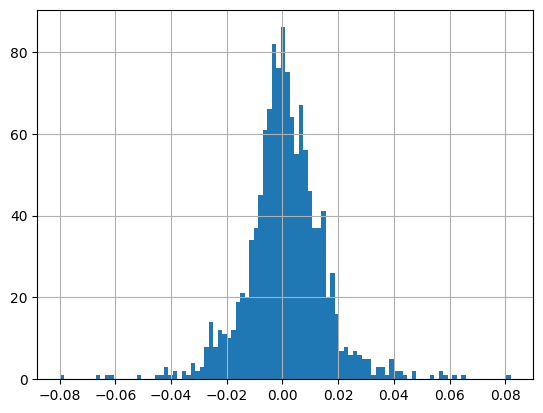

In [180]:
# aapl['Returns'].plot() #line chart
# aapl['Returns'].plot(kind='hist') #10 bins
aapl['Returns'].hist(bins=100)

## Afternoon Agenda
- merging data - concat, merge
- grouping data - groupby, pivot
- visualizations with pandas

### Concat - Stacking Data on Top
- pd.concat(list of table)

In [185]:
aapl = pd.read_csv('StockData/AAPL.csv',parse_dates=['Date'],index_col=['Date'])
nke = pd.read_csv('StockData/NKE.csv',parse_dates=['Date'],index_col=['Date'])
jpm = pd.read_csv('StockData/JPM.csv',parse_dates=['Date'],index_col=['Date'])

In [187]:
aapl['Ticker'] = 'AAPL'
nke['Ticker'] = 'NKE'
# jpm['Symbol'] = 'JPM' #make sure the headers have same spelling
jpm['Ticker'] = 'JPM'
stockData = pd.concat([aapl, nke, jpm])
# stockData

In [202]:
tickers = ['AAPL', 'NKE', 'JPM', 'WMT', 'MCD', 'KO']
tables = [] #list to store all the files
for ticker in tickers:
    table = pd.read_csv('StockData/'+ticker+'.csv',parse_dates=['Date'],index_col=['Date'])
    table['Ticker'] = ticker
    tables.append(table)

In [ ]:
tables[0] #AAPL
tables[1] #NKE

In [198]:
stockData = pd.concat(tables)
stockData

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900,AAPL
2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000,AAPL
2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300,AAPL
2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100,AAPL
2013-10-07,69.508568,70.378571,69.335716,69.678574,63.495800,78073100,AAPL
...,...,...,...,...,...,...,...
2018-09-24,46.490002,46.529999,45.840000,46.070000,46.070000,10778900,KO
2018-09-25,46.060001,46.180000,45.610001,45.680000,45.680000,7919100,KO
2018-09-26,45.770000,46.070000,45.570000,45.849998,45.849998,10162600,KO


## Merging Data Side By Side
- pd.merge(table1, table2),  table1.merge(table2)
- how: inner, outer, left, right
- on: the columns to "line up"
    - left_on and right_on if the headers are not the same spelling
    - left_on=['Expiry Date'], right_on=['Maturity Date']
    - left_index=True, right_on=['Date']

In [217]:
pd.__version__

'2.0.3'

In [204]:
sp500 = pd.read_csv('StockData/sp500.csv',parse_dates=['Date'],index_col=['Date'])

In [208]:
#sp500 #first date is Sep 30, 2013
#aapl # 2013-10-01	

In [214]:
#merged = sp500.merge(aapl, on='Date', how='left')
merged = aapl.merge(sp500, on='Date', how='right', suffixes=("_AAPL", "_SP"))
# merged = aapl.merge(sp500, left_index=True, right_index=True, how='right', suffixes=("_AAPL", "_SP"))
        #default how= 'inner'
        #for any cols that are NOT merged, but have same spelling, will differentiate with suffxies _x, _y
merged

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Ticker,Open_SP,High_SP,Low_SP,Close_SP,Adj Close_SP,Volume_SP
Date,,,,,,,,,,,,,
2013-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000
2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900.0,AAPL,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000
2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000.0,AAPL,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000
2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300.0,AAPL,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000
2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100.0,AAPL,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-24,216.820007,221.259995,216.630005,220.789993,220.789993,27693400.0,AAPL,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000
2018-09-25,219.750000,222.820007,219.699997,222.190002,222.190002,24554400.0,AAPL,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000
2018-09-26,221.000000,223.750000,219.759995,220.419998,220.419998,23984700.0,AAPL,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000


## Grouping Data
- similar to sumifs, countifs, averageifs in Excel
- `table.groupby(categories to summarize)[[headers to calculate]].function()`
- as the function, you can use .agg(list of functions)
- as the input for the agg, can provide a dictionary, keys = headers, values = functions

In [230]:
aapl['Year'] = aapl.index.year
aapl['Quarter'] = aapl.index.quarter
        # aapl['Date'].dt.year #if Date not the index

In [233]:
#different calcs for diff columns
rules_to_aggr = {'High':'max', 'Low':'min', 'Close':'last', 'Open':'first',
                 'Volume':'sum'}
pivot = aapl.groupby(['Year','Quarter']).agg(rules_to_aggr)
pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, (2013, 4) to (2018, 3)
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    20 non-null     float64
 1   Low     20 non-null     float64
 2   Close   20 non-null     float64
 3   Open    20 non-null     float64
 4   Volume  20 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 989.0 bytes


In [234]:
pivot.loc[(2014,2)]['High']

95.050003

In [235]:
pivot.reset_index()

,Year,Quarter,High,Low,Close,Open,Volume
0,2013,4,82.162857,68.325714,80.145714,68.349998,5030071200
1,2014,1,80.028572,70.507141,76.677139,79.382858,4912005000
2,2014,2,95.050003,73.047142,92.930000,76.822861,4249617100
3,2014,3,103.739998,92.570000,100.750000,93.519997,3498583000
4,2014,4,119.750000,95.180000,110.379997,100.589996,3254283000
5,2015,1,133.600006,104.629997,124.430000,111.389999,3579821100
6,2015,2,134.539993,123.099998,125.430000,124.820000,2828800200
7,2015,3,132.970001,92.000000,110.300003,126.900002,3870032800
8,2015,4,123.820000,104.820000,105.260002,109.070000,2784493400
9,2016,1,110.419998,92.389999,108.989998,102.610001,2827936300


In [224]:
aapl

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year
Date,,,,,,,,
2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900,AAPL,2013
2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000,AAPL,2013
2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300,AAPL,2013
2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100,AAPL,2013
2013-10-07,69.508568,70.378571,69.335716,69.678574,63.495800,78073100,AAPL,2013
...,...,...,...,...,...,...,...,...
2018-09-24,216.820007,221.259995,216.630005,220.789993,220.789993,27693400,AAPL,2018
2018-09-25,219.750000,222.820007,219.699997,222.190002,222.190002,24554400,AAPL,2018
2018-09-26,221.000000,223.750000,219.759995,220.419998,220.419998,23984700,AAPL,2018


In [244]:
# finData
finData.groupby(['INDUSTRY','TYPE'])[['SIZE']].sum()
deals_pivot = finData.groupby(['INDUSTRY','TYPE'])[['SIZE']].agg(['sum', 'count','mean'])

In [237]:
# deals_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75 entries, ('Auto/Truck', 'Equity Follow-On Offering') to ('Utility', 'Sr Notes')
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (SIZE, sum)    75 non-null     float64
 1   (SIZE, count)  75 non-null     int64  
 2   (SIZE, mean)   75 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.3+ KB


In [242]:
#deals_pivot.reset_index(inplace=True)

In [246]:
deals_pivot.columns = ['sum','count','mean']

In [248]:
deals_pivot.reset_index()

,INDUSTRY,TYPE,sum,count,mean
0,Auto/Truck,Equity Follow-On Offering,206.250,1,206.250000
1,Broadcasting,Equity Follow-On Offering,78.750,1,78.750000
2,Chemicals,Equity Follow-On Offering,431.540,4,107.885000
3,Chemicals,Notes,200.260,1,200.260000
4,Chemicals,Sr Notes,1100.570,3,366.856667
...,...,...,...,...,...
70,Transportation,Sr Notes,1185.632,4,296.408000
71,Utility,Equity Follow-On Offering,1980.650,5,396.130000
72,Utility,Notes,765.250,4,191.312500
73,Utility,Preferred Securities,350.477,2,175.238500
